In [1]:
from google.colab import files
uploaded = files.upload()

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx


In [6]:
import pandas as pd
FILEPATH = next(iter(uploaded))  # this grabs the first uploaded filename

# Step 3: Read all sheets from the Excel file
dataframes = pd.read_excel(FILEPATH, sheet_name=None)

# Step 4: Display sheet names
print("Sheets found:", list(dataframes.keys()))

# Step 5: Show first few rows of the first sheet
first_sheet_name = list(dataframes.keys())[0]
df = dataframes[first_sheet_name]
df.head()

Sheets found: ['in']


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:

import pandas as pd
import numpy as np

FILEPATH = '1730285881-Airbnb_Open_Data.xlsx'

# Read the only sheet (named 'in' from preview)
df = pd.read_excel(FILEPATH, sheet_name='in', engine='calamine')

print(df.head(10))
print(df.shape)
print(df.isna().sum())
print(df.dtypes)

# Convert date-like and categorical columns for better downstream analysis
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Ensure booleans for instant_bookable
if 'instant_bookable' in df.columns:
    if df['instant_bookable'].dtype != bool:
        df['instant_bookable'] = df['instant_bookable'].astype('bool', errors='ignore')

# Summary statistics
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print(df[num_cols].describe())
print(df[cat_cols].describe(include='all'))

print('Loaded and profiled')

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
6  1004650                                   BlissArtsSpace!  61300605564   
7  1005202                                   BlissArtsSpace!  90821839709   
8  1005754                   Large Furnished Room Near B'way  79384379533   
9  1006307                Cozy Clean Guest Room - Family Apt  75527839483   

  host_identity_verified host name neighbourhood group       neighbourhood  \
0            unconfirmed  Madaline            Brooklyn          Kensington

license                           102597
house_rules                        54843
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            408
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 270
price                                247
Construction year                    214
number of reviews                    183
country code                         131
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
dtype: int64
102599
102058
102058
neighbourhood
Bedford-Stuyvesant    7882
Williamsburg          7713
Harlem                5431
Bushwick              4940
Hell's Kitchen        39

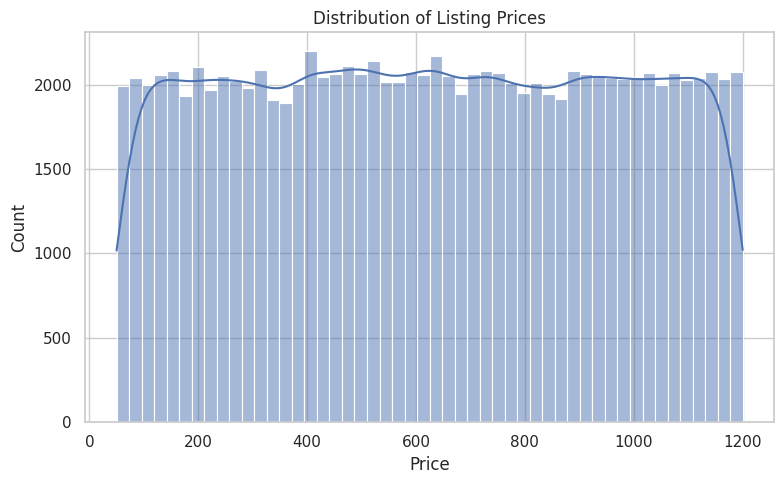

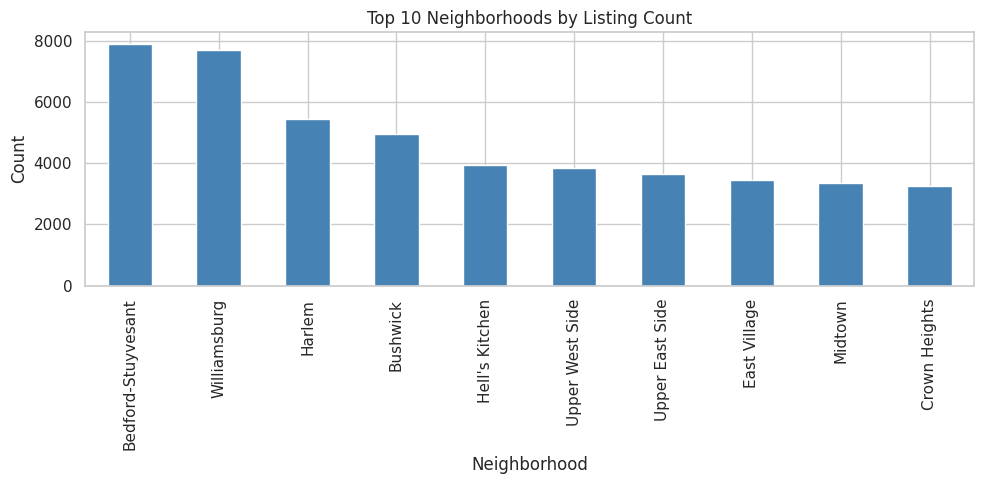

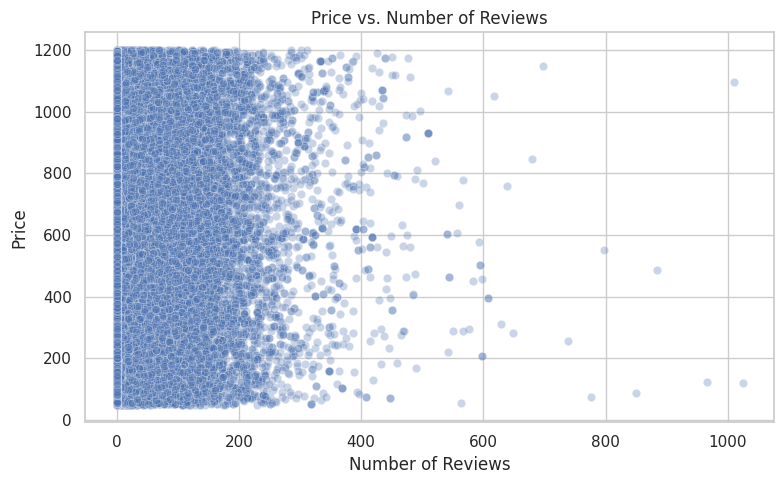

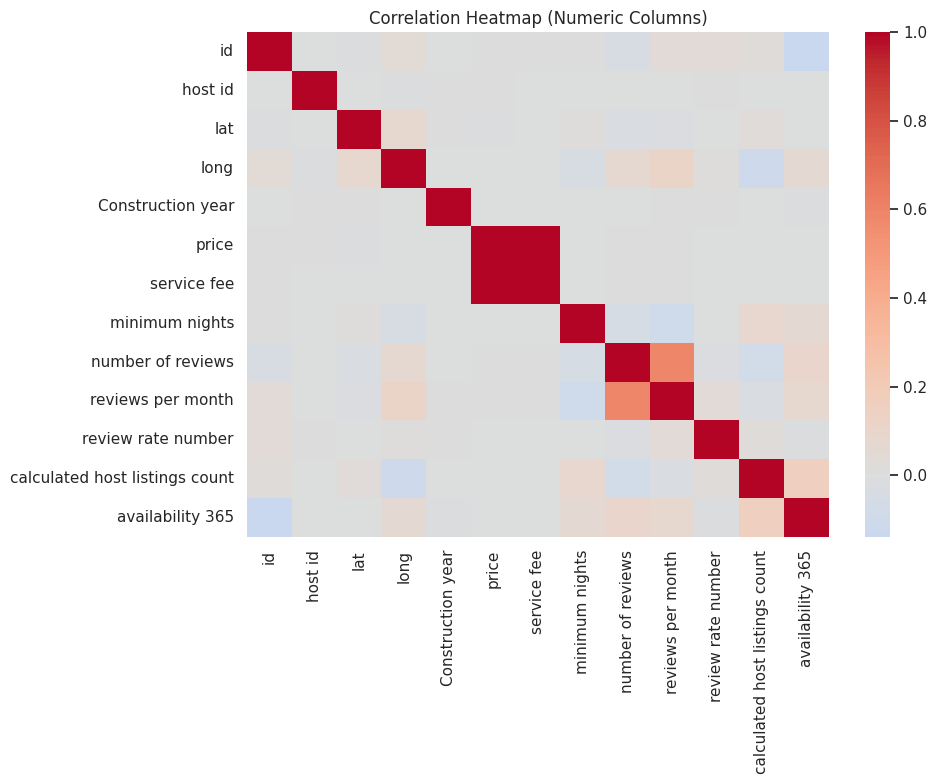

EDA cleaning and plots done


In [9]:
# Handle missing data overview, duplicates, and create cleaned dataframe; then compute EDA insights and create plots.
# We'll: (1) count nulls, (2) drop exact dupes by id, (3) basic aggregations, (4) plots.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# df is already in memory from prior cell

# Null overview
null_counts = df.isna().sum().sort_values(ascending=False)
print(null_counts.head(20))

# Remove duplicates by full row and by id
before_rows = df.shape[0]
df = df.drop_duplicates()
after_full_dedup = df.shape[0]

if 'id' in df.columns:
    df = df.sort_values('last review', na_position='last')
    df = df.drop_duplicates(subset=['id'], keep='last')
after_id_dedup = df.shape[0]

print(before_rows)
print(after_full_dedup)
print(after_id_dedup)

# Basic cleaning for analysis columns
if 'price' in df.columns:
    df = df[pd.to_numeric(df['price'], errors='coerce').notna()]
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Popular neighborhoods
top_neigh = df['neighbourhood'].value_counts().head(10)
print(top_neigh)

# Average price per room type
avg_price_room = df.groupby('room type')['price'].mean().sort_values(ascending=False)
print(avg_price_room.head(10))

# Relationship price vs reviews (scatter later)
# Distribution of availability
avail_col = 'availability 365'
availability_desc = df[avail_col].describe()
print(availability_desc)

# Visualizations
sns.set(style='whitegrid')

# Histogram of prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar chart of top 10 neighborhoods by listing count
plt.figure(figsize=(10,5))
top_neigh.plot(kind='bar', color='steelblue')
plt.title('Top 10 Neighborhoods by Listing Count')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Scatter plot of price vs number of reviews
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='number of reviews', y='price', alpha=0.3)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Correlation heatmap for numeric columns
num_df = df.select_dtypes(include=[np.number]).copy()
num_df = num_df.dropna(axis=1, how='all')

plt.figure(figsize=(10,8))
corr = num_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.tight_layout()
plt.show()

print('EDA cleaning and plots done')